In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Sebastian\ds-takehome\data\credit_scoring.csv')

# Tampilkan 5 baris awal
df.head()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
0,501000,41,13995609,5982664,0,624,0,0,-0.040
1,501001,58,13683833,3711198,0,809,0,0,0.001
2,501002,33,9417391,7172332,0,647,0,0,0.077
3,501003,45,6861811,8661056,0,450,0,0,0.038
4,501004,22,5640742,4520669,1,816,0,0,0.020


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


In [6]:
# Lihat semua nama kolom
print(df.columns.tolist())

# Cek deskripsi singkat
df.describe()

['application_id', 'age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score', 'default', 'leak_col_good', 'leak_col_subtle']


,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167,0.012167,0.011945
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639,0.109639,0.113947
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000,0.000000,-0.119000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000,0.000000,-0.020000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000,0.000000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000,0.000000,0.021000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000,1.000000,1.092000


In [7]:
# Drop kolom leakage
df_clean = df.drop(columns=['leak_col_good', 'leak_col_subtle', 'application_id'])

# Pisahkan fitur dan target
X = df_clean.drop(columns='default')
y = df_clean['default']

# Cek hasil
X.head()


,age,monthly_income,loan_amount,previous_defaults,credit_score
0,41,13995609,5982664,0,624
1,58,13683833,3711198,0,809
2,33,9417391,7172332,0,647
3,45,6861811,8661056,0,450
4,22,5640742,4520669,1,816


In [8]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Buat model dan fit
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Prediksi probabilitas
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]

# Evaluasi
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, model_lr.predict(X_test)))


AUC: 0.6958649789029536

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.98      0.99      0.98      1200



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Buat model boosting
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

# Evaluasi
y_pred_gb = model_gb.predict(X_test)
y_pred_proba_gb = model_gb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("AUC (GB):", roc_auc_score(y_test, y_pred_proba_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


AUC (GB): 0.6863009845288326

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.98      0.99      0.98      1200



In [11]:
# Fungsi konversi probabilitas ke skor kredit 300–850
def scorecard(prob, base=300, pdo=50, odds=1/19):
    import numpy as np
    factor = pdo / np.log(2)
    offset = base - factor * np.log(odds)
    return offset - factor * np.log(prob / (1 - prob))

# Terapkan ke hasil prediksi
credit_scores = scorecard(y_pred_proba_gb)
credit_scores[:5]


array([ 952.3570563 ,  867.45964481, 1071.70059218,  921.72929703,
        980.64959355])

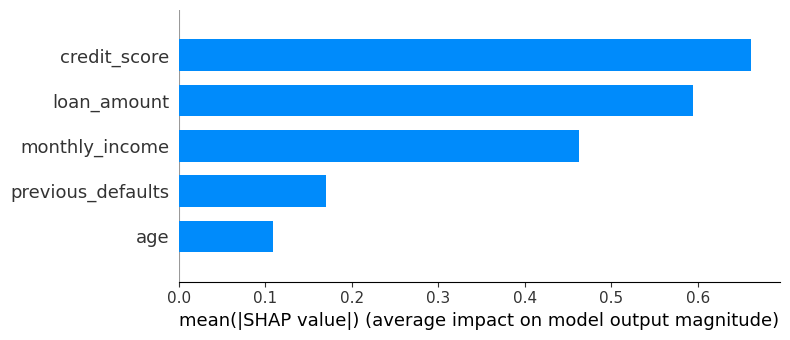

In [12]:
import shap

# Buat explainer dan hitung shap values
explainer = shap.Explainer(model_gb)
shap_values = explainer(X_test)

# Plot 10 fitur teratas
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)


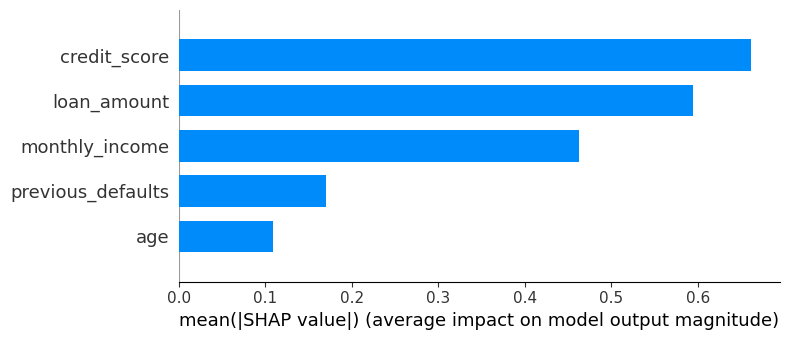

In [13]:
import matplotlib.pyplot as plt

plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("shap_feature_importance.png")

In [14]:
# Gabungkan prediksi dengan data asli
candidates = X_test.copy()
candidates['default_proba'] = y_pred_proba_gb
candidates['score'] = scorecard(y_pred_proba_gb)

# Urutkan dari yang paling aman
top_pick = candidates.sort_values('default_proba').head(1)
top_pick

,age,monthly_income,loan_amount,previous_defaults,credit_score,default_proba,score
304,30,3911228,6882220,0,541,0.000008,1356.009731
